### 모델평가
- 다양한 모델, 다양한 파라미터를 두고 상대적으로 비교
- 데이터 수집/가공/변환 $\rightarrow$ 모델 학습/예측 $\rightarrow$ 모델 평가 $\rightarrow$ 데이터 수집/가공/변환 $\cdots$


#### 회귀모델
- 실제값과 에러치를 가지고 계산
- 간단한 편

#### 분류모델
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 score
- ROC AUC

#### 이진분류모델
- TP(True Positive)
    - 실제 positive를 positive라고 맞춘 경우
- FN(False Negative): Type 2 Error
    - 실제 positive를 negative라고 틀리게 예측한 경우
- TN(True Negative)
    - 실제 negative를 negative라고 맞춘 경우
- FP(False Positive): Type 1 Error
    - 실제 negative를 positive라고 예측한 경우

모델 평가

- Accuracy 
    - 전체 데이터 중 맞게 예측한 것의 비율
    - $TP + TN \over TP + TF + FP + FN$
- Precision 
    - 참이라고 예측한 것 중에 실제 참인 데이터의 비율
    - 실제 거짓(음성)인 데이터를 참(양성)이라고 판단하면 안되는 경우 중요(스팸메일)
    - $TP \over TP + TF$
- Recall(TPR; True Positive Ratio) 
    - 참인 데이터 중에서 참이라고 예측한 것의 비율
    - 실제 참인 데이터를 거짓이라고 판단하면 안되는 경우 중요(암환자 판별
    - $TP \over TP + FN$
- Fall-Out(FPR; False Position Ratio) 
    - 실제로는 거짓인데 참이라고 잘못 예측한 데이터의 비율
    - $FP \over FP + TN$

---
- F1-score
    - $F_1 = {2 \cdot precision \cdot recall\over (precision + recall)}$
    - Recall과 Precision을 결합한 지표
    - 두 값 모두 높은 값을 가질수록 F1-score가 높아진다
    
---
- ROC-curve
    - FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)의 변화를 그린 그림
    - FPR을 x축, TPR을 y축으로 놓고 그림
    - FPR은 Fall-Out을 의미, TPR은 Recall을 의미
    - 직선에 가까울수록 머신러닝 모델의 성능이 떨어지는 것으로 판단
    
---
- AUC
    - ROC 곡선과 x축 사이의 면적
    - 1에 가까울수록 모델의 성능이 좋다
    - 기울기 1인 직선 아래의 면적이 0.5이므로, 0.5보다는 커야한다


#### ROC-curve 그려보기

1. 데이터 로드

In [1]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')


red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

2. 의사결정나무

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_train = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuarcy : ',  accuracy_score(y_train, y_pred_train))
print('Test Accuarcy : ',  accuracy_score(y_test, y_pred_test))

Train Accuarcy :  0.7294593034442948
Test Accuarcy :  0.7161538461538461


3. 각각의 수치 구해보기

In [4]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)

print(f'Accuracy : {accuracy_score(y_test, y_pred_test)}\nRecall : {recall_score(y_test, y_pred_test)}\nPrecision : {precision_score(y_test, y_pred_test)}\nAUC Score : {roc_auc_score(y_test, y_pred_test)}\nF1 Score : {f1_score(y_test, y_pred_test)}')

Accuracy : 0.7161538461538461
Recall : 0.7314702308626975
Precision : 0.8026666666666666
AUC Score : 0.7105988470875331
F1 Score : 0.7654164017800381


4. ROC Curve 그리기

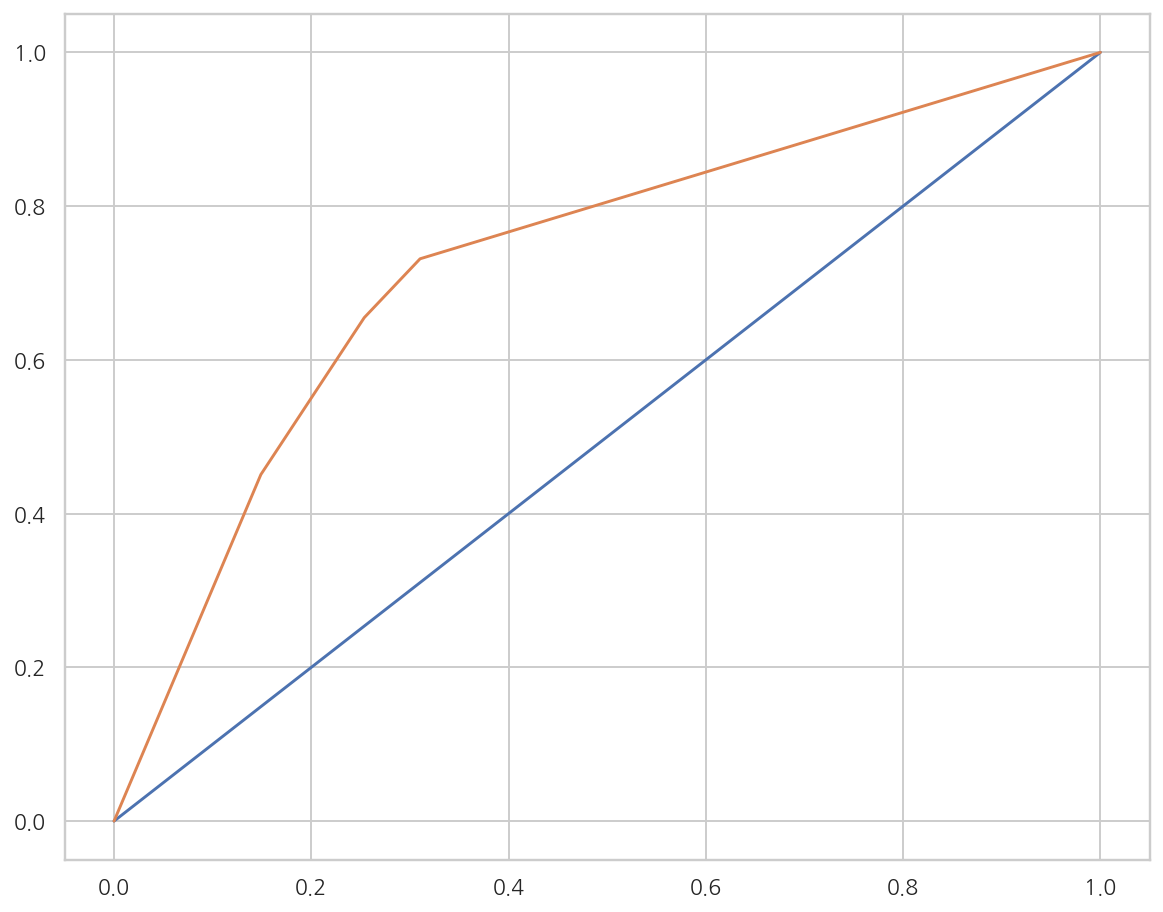

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8), dpi=70)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()